## Shortest Paths problem solved with Bellman-Ford

A shortest path is the quickest way to pass from node A to node B in a network. In an all-positive graph, Dikikstra algorithm solves the shortest paths problem pretty well. Dijikstra is limited, however, for networks with positive edges only. 

The Bellman-Ford algorithm solves for the shortest paths problem in networks that contain negative edges. It is the most basic algorithm used to find shortest paths in networks with negative edges.

#### Creating Bellman-Ford's algorithm
Most of this work is copied from Coding Perspective: https://www.youtube.com/watch?v=ne9eZ4ezg0Y

In [1]:
def bellman_ford(graph, source):
    
    # Step 1: Prepare the distance and predecessor for each node
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[source] = 0

    # Step 2: Relax the edges
    for _ in range(len(graph) - 1):
        for node in graph:
            for neighbour in graph[node]:
                # If the distance between the node and the neighbour is lower than the current, store it
                if distance[neighbour] > distance[node] + graph[node][neighbour]:
                    distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    # Step 3: Check for negative weight cycles
    for node in graph:
        for neighbour in graph[node]:
            assert distance[neighbour] <= distance[node] + graph[node][neighbour], "Negative weight cycle."
 
    return distance, predecessor

#### Creating network with igraph

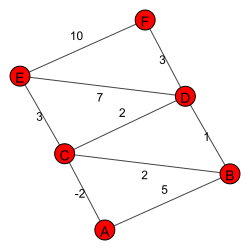

In [6]:
from igraph import *
#import cairocffi

#print("'igraph' version number", igraph.__version__)
g = Graph() # Initiating graph
g.add_vertices(6) # Making 6 vertices
g = Graph() # Initiating graph
g.add_vertices(6) # Making 5 vertices

# Creating edges
g.add_edges([(0, 1), (0, 2),
             (1, 2), (1, 3),
             (2, 3), (2, 4),
             (3, 4), (3, 5),
             (4, 5)])

# Adding weigth labels to plot
g.es["label"] = [5, -2,
                 2, 1,
                 2, 3,
                 7, 3,
                 10
                ]
nodes =  ["A", "B", "C", "D", "E", "F"]
layout = g.layout('kk')
plot(g, layout = layout, bbox = (250, 250), margin = 20, vertex_label = nodes)

In [7]:
graph = {'a': {'b': 5, 'c': -2},
         'b': {'d': 1},
         'c': {'b': 2, 'e': 3},
         'd': {'c': 2, 'e': 7, 'f': 3},
         'e': {'f': 10},
         'f': {}
        }
 
distance, predecessor = bellman_ford(graph, source='a')

print('Predecessor:\n',predecessor, '\nDistance:\n', distance)

Predecessor:
 {'a': None, 'b': 'c', 'c': 'a', 'd': 'b', 'e': 'c', 'f': 'd'} 
Distance:
 {'a': 0, 'b': 0, 'c': -2, 'd': 1, 'e': 1, 'f': 4}


In [8]:
distance, predecessor = bellman_ford(graph, source='e')

print('Predecessor:\n',predecessor, '\nDistance:\n', distance)

Predecessor:
 {'a': None, 'b': None, 'c': None, 'd': None, 'e': None, 'f': 'e'} 
Distance:
 {'a': inf, 'b': inf, 'c': inf, 'd': inf, 'e': 0, 'f': 10}
